In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [472]:
df = pd.read_csv("titanic/train.csv")

In [473]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove unwanted columns

In [474]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1) #axis is required

In [475]:
df
from numpy import nan

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [477]:
df = df.drop(['Cabin'], axis=1) #axis is required

In [478]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Filling missing values in age by average age of males and females

In [479]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [480]:
df[df['Embarked'].isna()].index

Int64Index([61, 829], dtype='int64')

In [481]:
df.drop([61, 829], axis =0, inplace=True)

In [482]:
df.reset_index(drop=True, inplace=True)

In [483]:
mean_all = df['Age'].mean()
mean_all

29.64209269662921

In [484]:
mean_male = df[df['Sex'] == 'male']['Age'].mean()
mean_male

30.72664459161148

In [485]:
mean_female = df[df['Sex'] == 'female']['Age'].mean()
mean_female

27.745173745173744

In [486]:
df_test = df.copy()

In [487]:
men_nan_index_list = df[(df['Age'].isna()) & (df['Sex'] == 'male')]['Age'].index

In [488]:
men_nan_index_list

Int64Index([  5,  17,  26,  29,  36,  42,  45,  46,  48,  55,
            ...
            824, 825, 827, 830, 835, 837, 844, 857, 866, 876],
           dtype='int64', length=124)

In [489]:
for i in men_nan_index_list:
    df.iloc[i, 3:4] = mean_male

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       836 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.7+ KB


In [491]:
women_nan_index_list = df[(df['Age'].isna()) & (df['Sex'] == 'female')]['Age'].index
for i in women_nan_index_list:
    df.iloc[i, 3:4] = mean_female

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.7+ KB


### Outlier

<AxesSubplot:>

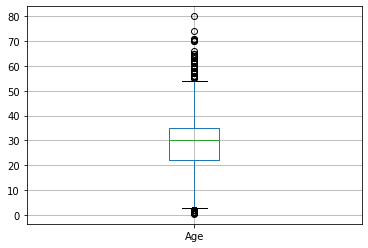

In [493]:
df.boxplot(column=['Age'])

In [494]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.335549,-0.085832,-0.034040,0.083151
Pclass,-0.335549,1.000000,-0.327265,0.081656,0.016824
Age,-0.085832,-0.327265,1.000000,-0.236473,-0.181569
SibSp,-0.034040,0.081656,-0.236473,1.000000,0.414542
Parch,0.083151,0.016824,-0.181569,0.414542,1.000000


In [495]:
df['Sex'].replace(to_replace = 'male', value = 1, inplace=True)
df['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

In [496]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [497]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.335549,-0.541585,-0.085832,-0.034040,0.083151
Pclass,-0.335549,1.000000,0.127741,-0.327265,0.081656,0.016824
Sex,-0.541585,0.127741,1.000000,0.109665,-0.116348,-0.247508
Age,-0.085832,-0.327265,0.109665,1.000000,-0.236473,-0.181569
SibSp,-0.034040,0.081656,-0.116348,-0.236473,1.000000,0.414542
Parch,0.083151,0.016824,-0.247508,-0.181569,0.414542,1.000000


In [498]:
# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform(df.Embarked.values.reshape(-1,1)).toarray()
# df_one_hot = pd.DataFrame(X, columns= ['C', 'Q', 'S'])
# df = pd.concat([df, df_one_hot], axis=1)

In [499]:
one = pd.get_dummies(df['Embarked'])
df = pd.concat([df, one], axis=1)

In [500]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,C,Q,S
0,0,3,1,22.0,1,0,S,0,0,1
1,1,1,0,38.0,1,0,C,1,0,0
2,1,3,0,26.0,0,0,S,0,0,1
3,1,1,0,35.0,1,0,S,0,0,1
4,0,3,1,35.0,0,0,S,0,0,1


In [501]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.085832,-0.034040,0.083151,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327265,0.081656,0.016824,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.109665,-0.116348,-0.247508,-0.084520,-0.075217,0.121405
Age,-0.085832,-0.327265,0.109665,1.000000,-0.236473,-0.181569,0.033541,-0.019982,-0.016809
SibSp,-0.034040,0.081656,-0.116348,-0.236473,1.000000,0.414542,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.181569,0.414542,1.000000,-0.011588,-0.081585,0.061512
C,0.169966,-0.245733,-0.084520,0.033541,-0.060074,-0.011588,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.019982,-0.026692,-0.081585,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.016809,0.069438,0.061512,-0.782613,-0.499261,1.000000


In [502]:
df.drop(['Embarked'], axis=1, inplace=True)

In [503]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.085832,-0.034040,0.083151,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327265,0.081656,0.016824,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.109665,-0.116348,-0.247508,-0.084520,-0.075217,0.121405
Age,-0.085832,-0.327265,0.109665,1.000000,-0.236473,-0.181569,0.033541,-0.019982,-0.016809
SibSp,-0.034040,0.081656,-0.116348,-0.236473,1.000000,0.414542,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.181569,0.414542,1.000000,-0.011588,-0.081585,0.061512
C,0.169966,-0.245733,-0.084520,0.033541,-0.060074,-0.011588,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.019982,-0.026692,-0.081585,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.016809,0.069438,0.061512,-0.782613,-0.499261,1.000000


In [504]:
df.drop(['Q'], axis=1, inplace=True)

In [505]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,S
Survived,1.000000,-0.335549,-0.541585,-0.085832,-0.034040,0.083151,0.169966,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327265,0.081656,0.016824,-0.245733,0.076466
Sex,-0.541585,0.127741,1.000000,0.109665,-0.116348,-0.247508,-0.084520,0.121405
Age,-0.085832,-0.327265,0.109665,1.000000,-0.236473,-0.181569,0.033541,-0.016809
SibSp,-0.034040,0.081656,-0.116348,-0.236473,1.000000,0.414542,-0.060074,0.069438
Parch,0.083151,0.016824,-0.247508,-0.181569,0.414542,1.000000,-0.011588,0.061512
C,0.169966,-0.245733,-0.084520,0.033541,-0.060074,-0.011588,1.000000,-0.782613
S,-0.151777,0.076466,0.121405,-0.016809,0.069438,0.061512,-0.782613,1.000000


In [506]:
one_pclass = pd.get_dummies(df['Pclass'])
df = pd.concat([df, one_pclass], axis=1)
df.drop(['Pclass'], axis=1, inplace=True)

In [507]:
df.corr()

,Survived,Sex,Age,SibSp,Parch,C,S,1,2,3
Survived,1.000000,-0.541585,-0.085832,-0.034040,0.083151,0.169966,-0.151777,0.282368,0.095002,-0.320171
Sex,-0.541585,1.000000,0.109665,-0.116348,-0.247508,-0.084520,0.121405,-0.093142,-0.066459,0.134227
Age,-0.085832,0.109665,1.000000,-0.236473,-0.181569,0.033541,-0.016809,0.315276,0.008493,-0.277980
SibSp,-0.034040,-0.116348,-0.236473,1.000000,0.414542,-0.060074,0.069438,-0.052894,-0.056507,0.091515
Parch,0.083151,-0.247508,-0.181569,0.414542,1.000000,-0.011588,0.061512,-0.015809,-0.001278,0.014634
C,0.169966,-0.084520,0.033541,-0.060074,-0.011588,1.000000,-0.782613,0.299472,-0.126039,-0.154785
S,-0.151777,0.121405,-0.016809,0.069438,0.061512,-0.782613,1.000000,-0.165022,0.190824,-0.013594
1,0.282368,-0.093142,0.315276,-0.052894,-0.015809,0.299472,-0.165022,1.000000,-0.287653,-0.625395
2,0.095002,-0.066459,0.008493,-0.056507,-0.001278,-0.126039,0.190824,-0.287653,1.000000,-0.567432
3,-0.320171,0.134227,-0.277980,0.091515,0.014634,-0.154785,-0.013594,-0.625395,-0.567432,1.000000


In [508]:
df.drop([2], axis=1, inplace=True)

In [509]:
df.head()

,Survived,Sex,Age,SibSp,Parch,C,S,1,3
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,1,0,1,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,1,0
4,0,1,35.0,0,0,0,1,0,1


In [510]:
normalize_scale = MinMaxScaler()

ns_scale_SibSp = MinMaxScaler()
ns_scale_Parch = MinMaxScaler()
ns_scale_Age = MinMaxScaler()

SibSp = ns_scale_SibSp.fit(df[['SibSp']])
Parch = ns_scale_Parch.fit(df[['Parch']])
Age = ns_scale_Age.fit(df[['Age']])

df['Age'] = Age.transform(df[['Age']])
df['SibSp'] = SibSp.transform(df[['SibSp']])
df['Parch'] = Parch.transform(df[['Parch']])



In [511]:
# std_scale_SibSp = StandardScaler()
# std_scale_Parch = StandardScaler()
# std_scale_Age = StandardScaler()

# StandardScaler(copy=True, with_mean=True, with_std=True)

# SibSp = std_scale_SibSp.fit(df[['SibSp']])

# Parch = std_scale_Parch.fit(df[['Parch']])

# Age = std_scale_Age.fit(df[['Age']])


# df['Age'] = Age.transform(df[['Age']])
# df['SibSp'] = SibSp.transform(df[['SibSp']])
# df['Parch'] = Parch.transform(df[['Parch']])

In [512]:
df.head()

,Survived,Sex,Age,SibSp,Parch,C,S,1,3
0,0,1,0.271174,0.125,0.0,0,1,0,1
1,1,0,0.472229,0.125,0.0,1,0,1,0
2,1,0,0.321438,0.000,0.0,0,1,0,1
3,1,0,0.434531,0.125,0.0,0,1,1,0
4,0,1,0.434531,0.000,0.0,0,1,0,1


In [513]:
df.head()

,Survived,Sex,Age,SibSp,Parch,C,S,1,3
0,0,1,0.271174,0.125,0.0,0,1,0,1
1,1,0,0.472229,0.125,0.0,1,0,1,0
2,1,0,0.321438,0.000,0.0,0,1,0,1
3,1,0,0.434531,0.125,0.0,0,1,1,0
4,0,1,0.434531,0.000,0.0,0,1,0,1


In [514]:
df.corr()

,Survived,Sex,Age,SibSp,Parch,C,S,1,3
Survived,1.000000,-0.541585,-0.085832,-0.034040,0.083151,0.169966,-0.151777,0.282368,-0.320171
Sex,-0.541585,1.000000,0.109665,-0.116348,-0.247508,-0.084520,0.121405,-0.093142,0.134227
Age,-0.085832,0.109665,1.000000,-0.236473,-0.181569,0.033541,-0.016809,0.315276,-0.277980
SibSp,-0.034040,-0.116348,-0.236473,1.000000,0.414542,-0.060074,0.069438,-0.052894,0.091515
Parch,0.083151,-0.247508,-0.181569,0.414542,1.000000,-0.011588,0.061512,-0.015809,0.014634
C,0.169966,-0.084520,0.033541,-0.060074,-0.011588,1.000000,-0.782613,0.299472,-0.154785
S,-0.151777,0.121405,-0.016809,0.069438,0.061512,-0.782613,1.000000,-0.165022,-0.013594
1,0.282368,-0.093142,0.315276,-0.052894,-0.015809,0.299472,-0.165022,1.000000,-0.625395
3,-0.320171,0.134227,-0.277980,0.091515,0.014634,-0.154785,-0.013594,-0.625395,1.000000


In [515]:
df.head()

,Survived,Sex,Age,SibSp,Parch,C,S,1,3
0,0,1,0.271174,0.125,0.0,0,1,0,1
1,1,0,0.472229,0.125,0.0,1,0,1,0
2,1,0,0.321438,0.000,0.0,0,1,0,1
3,1,0,0.434531,0.125,0.0,0,1,1,0
4,0,1,0.434531,0.000,0.0,0,1,0,1


In [516]:
X = df.drop(['Survived'], axis=1)
X.head()

,Sex,Age,SibSp,Parch,C,S,1,3
0,1,0.271174,0.125,0.0,0,1,0,1
1,0,0.472229,0.125,0.0,1,0,1,0
2,0,0.321438,0.000,0.0,0,1,0,1
3,0,0.434531,0.125,0.0,0,1,1,0
4,1,0.434531,0.000,0.0,0,1,0,1


In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'], test_size=0.33, random_state=42)

In [518]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [519]:
clf.score(X_test, y_test)

0.7993197278911565

In [520]:
clf_Random = RandomForestClassifier(max_depth=6, random_state=0).fit(X_train, y_train)

In [521]:
clf_Random.score(X_test, y_test)

0.8197278911564626

In [522]:
clf_neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf_neigh.score(X_test, y_test)                                

0.8027210884353742

In [523]:
df_test = pd.read_csv("titanic/test.csv")

In [524]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [525]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1) #axis is required

men_nan_index_list_test = df_test[(df_test['Age'].isna()) & (df_test['Sex'] == 'male')]['Age'].index
for i in men_nan_index_list_test:
    df_test.iloc[i, 3:4] = mean_male
    
women_nan_index_list_test = df_test[(df_test['Age'].isna()) & (df_test['Sex'] == 'female')]['Age'].index
for i in women_nan_index_list_test:
    df_test.iloc[i, 3:4] = mean_female
    
df_test['Sex'].replace(to_replace = 'male', value = 1, inplace=True)
df_test['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

one_test = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, one_test], axis=1)

df_test.drop(['Embarked'], axis=1, inplace=True)

one_pclass_test = pd.get_dummies(df_test['Pclass'])
df_test = pd.concat([df_test, one_pclass_test], axis=1)
df_test.drop(['Pclass'], axis=1, inplace=True)
df_test.drop([3], axis=1, inplace=True)

df_test['Age'] = Age.transform(df_test[['Age']])
df_test['SibSp'] = SibSp.transform(df_test[['SibSp']])
df_test['Parch'] = Parch.transform(df_test[['Parch']])
# df['Fare'] = std_scale.fit_transform(df[['Fare']])

In [526]:
df_test.head()

,Sex,Age,SibSp,Parch,C,Q,S,1,2
0,1,0.428248,0.000,0.000000,0,1,0,0,0
1,0,0.585323,0.125,0.000000,0,0,1,0,0
2,1,0.773813,0.000,0.000000,0,1,0,0,1
3,1,0.334004,0.000,0.000000,0,0,1,0,0
4,0,0.271174,0.125,0.166667,0,0,1,0,0


In [527]:
df_test[['Age']]

,Age
0,0.428248
1,0.585323
2,0.773813
3,0.334004
4,0.271174
...,...
413,NaN
414,0.484795
415,0.478512
416,NaN


In [528]:
Age.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.01256597]),
 'min_': array([-0.00527771]),
 'data_min_': array([0.42]),
 'data_max_': array([80.]),
 'data_range_': array([79.58])}

In [529]:
SibSp.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.125]),
 'min_': array([0.]),
 'data_min_': array([0.]),
 'data_max_': array([8.]),
 'data_range_': array([8.])}

In [530]:
Parch.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.16666667]),
 'min_': array([0.]),
 'data_min_': array([0.]),
 'data_max_': array([6.]),
 'data_range_': array([6.])}

In [531]:
n_df_train = pd.read_csv("titanic/train.csv")
n_df_test = pd.read_csv("titanic/train.csv")

n_df_train = n_df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
n_df_test = n_df_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)